In [104]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams
from scipy.spatial import distance

#plotting and visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.patches import Circle
%matplotlib inline

In [107]:
# Generating Mickey Mouse

# Circle 1 / Left Ear
np.random.seed(1122)
n_data = 10000

theta = np.linspace(0, 2*np.pi, n_data)
circle1Data = np.zeros((3, n_data))

circle1Data[0] = np.sin(theta) - 2
circle1Data[1] = 0
circle1Data[2] = np.cos(theta) * 3

# Circle 2 / Right Ear
theta = np.linspace(0, 2*np.pi, n_data)
circle2Data = np.zeros((3, n_data))

circle2Data[0] = np.sin(theta) + 2
circle2Data[1] = 0
circle2Data[2] = np.cos(theta) * 3

# Sphere / Head
n_data = 100
theta = np.linspace(0, np.pi, n_data)
phi = np.linspace(0, 2*np.pi, n_data)
sphereData = np.zeros((3, n_data**2))
phi, theta = np.meshgrid(phi, theta)

sphereData[0] = (np.sin(theta) * np.cos(phi)).flatten()
sphereData[1] = (np.sin(theta) * np.sin(phi)).flatten()
sphereData[2] = (np.cos(theta)).flatten() * 3

# Plot the Data
data = np.hstack((circle1Data, sphereData, circle2Data))

fig = go.Figure(data=[go.Scatter3d(
    x=data[0], y=data[1], z=data[2], 
    mode ='markers', 
    marker=dict(size = 3 , color = 'grey'))])

fig.update_layout(scene= dict(zaxis = dict(range=[-10, 10])))
fig.show()

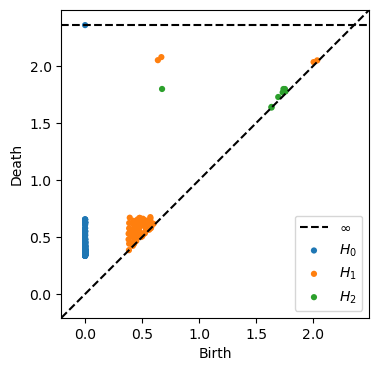

In [108]:
n_landmarks = 200
prime_coeff = 7
rips_persistence = ripser(data.T, n_perm = n_landmarks, coeff = prime_coeff, maxdim=2)
dgms = rips_persistence['dgms']
idx_perm = rips_persistence['idx_perm']
plt.figure(figsize = (4,4)) 
plot_diagrams(dgms)